CCPS 844 Data Mining (Project)
Submit your solution as a pdf file

1. Select a dataset or datasets of your choice. Here are few links that can be helpful for you to select a dataset.
 - https://www.data.gov/
 - https://www.healthdata.gov/
 - https://data.medicare.gov/data/hospital-compare
 - http://www.dol.gov/open/data.htm
 - http://www.toronto.ca/open
 - https://www.ontario.ca/page/sharing-government-data
 - https://nycopendata.socrata.com/
 - http://www.gsa.gov/portal/content/181595
 - http://open.canada.ca/en
 - http://www.statcan.gc.ca/eng/rdc/data
 - http://climate.weather.gc.ca/
 - http://archive.ics.uci.edu/ml/
 - http://githubarchive.org
 - http://www.crowdflower.com/data-for-everyone
 - http://www.kaggle.com/competitions
 - https://mimic.physionet.org/
2. Once you have selected a dataset or datasets of your choice. After reading the datasets, check the type of different attributes/columns/features to ensure that you have appropriate types (categorical/numerical) for your columns. 
3. Use visualization to understand your data
4. For exploratory analysis, apply clustering algorithms (K means/ Hierarchical clustering) to improve your understanding
5. Apply the concepts learned in Module 9 to select the features
6. Try to reduce the dimensions of the data if possible (Apply a dimensionality reduction algorithm). For step 7 use both the original data and the data that you get after applying the Step 6.
7. Divide your data in Train and Test or choose cross validation to evaluate the selected model
 - Apply all learned classification algorithms to choose which one performs best
 - Apply all learned regression algorithms to choose which one performs best

Please note that you need to get your data in appropriate format before applying a classification or regression algorithm. One of the differences is: class variable for a regression model is numeric whereas it is categorical for classification. 


In [1]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('User_Knowledge.csv')
df.sample(5)

,STG,SCG,STR,LPR,PEG,UNS
67,0.290,0.06,0.19,0.55,0.51,Middle
169,0.410,0.49,0.34,0.21,0.92,High
14,0.200,0.20,0.70,0.30,0.60,Middle
141,0.420,0.15,0.66,0.78,0.40,Middle
93,0.288,0.31,0.79,0.23,0.24,Low


#### Attribute Information

- STG (The degree of study time for goal object materails), (input value)
- SCG (The degree of repetition number of user for goal object materails) (input value) 
- STR (The degree of study time of user for related objects with goal object) (input value) 
- LPR (The exam performance of user for related objects with goal object) (input value) 
- PEG (The exam performance of user for goal objects) (input value) 
- UNS (The knowledge level of user) (target value) 
 - Very Low: 50 
 - Low:129 
 - Middle: 122 
 - High 130

In [3]:
df.UNS.unique()

array(['very_low', 'High', 'Low', 'Middle'], dtype=object)

In [4]:
df.loc[df.UNS == 'very_low','grade'] = 0
df.loc[df.UNS == 'Low','grade'] = 1
df.loc[df.UNS == 'Middle','grade'] = 2
df.loc[df.UNS == 'High','grade'] = 3

In [5]:
df.sample(5)

,STG,SCG,STR,LPR,PEG,UNS,grade
225,0.770,0.290,0.74,0.82,0.68,High,3.0
6,0.100,0.100,0.43,0.29,0.56,Middle,2.0
58,0.180,0.510,0.58,0.33,0.82,High,3.0
221,0.770,0.267,0.59,0.78,0.28,Middle,2.0
96,0.295,0.250,0.73,0.77,0.19,Low,1.0


In [6]:
y = list(df['UNS'])

In [7]:
X = df.loc[:,'STG':'PEG']

In [8]:
# pairing study time for goal objects and related objects
study_time = df[['STG','STR']]
# pairing exam performance for goal and related objects
exam_perf = df[['LPR','PEG']]
# pairing study time and exam performance for goal objects
goal_results = df[['STG','PEG']]
# pairing study time and exam performance for related objects
goal_related = df[['STR','LPR']]

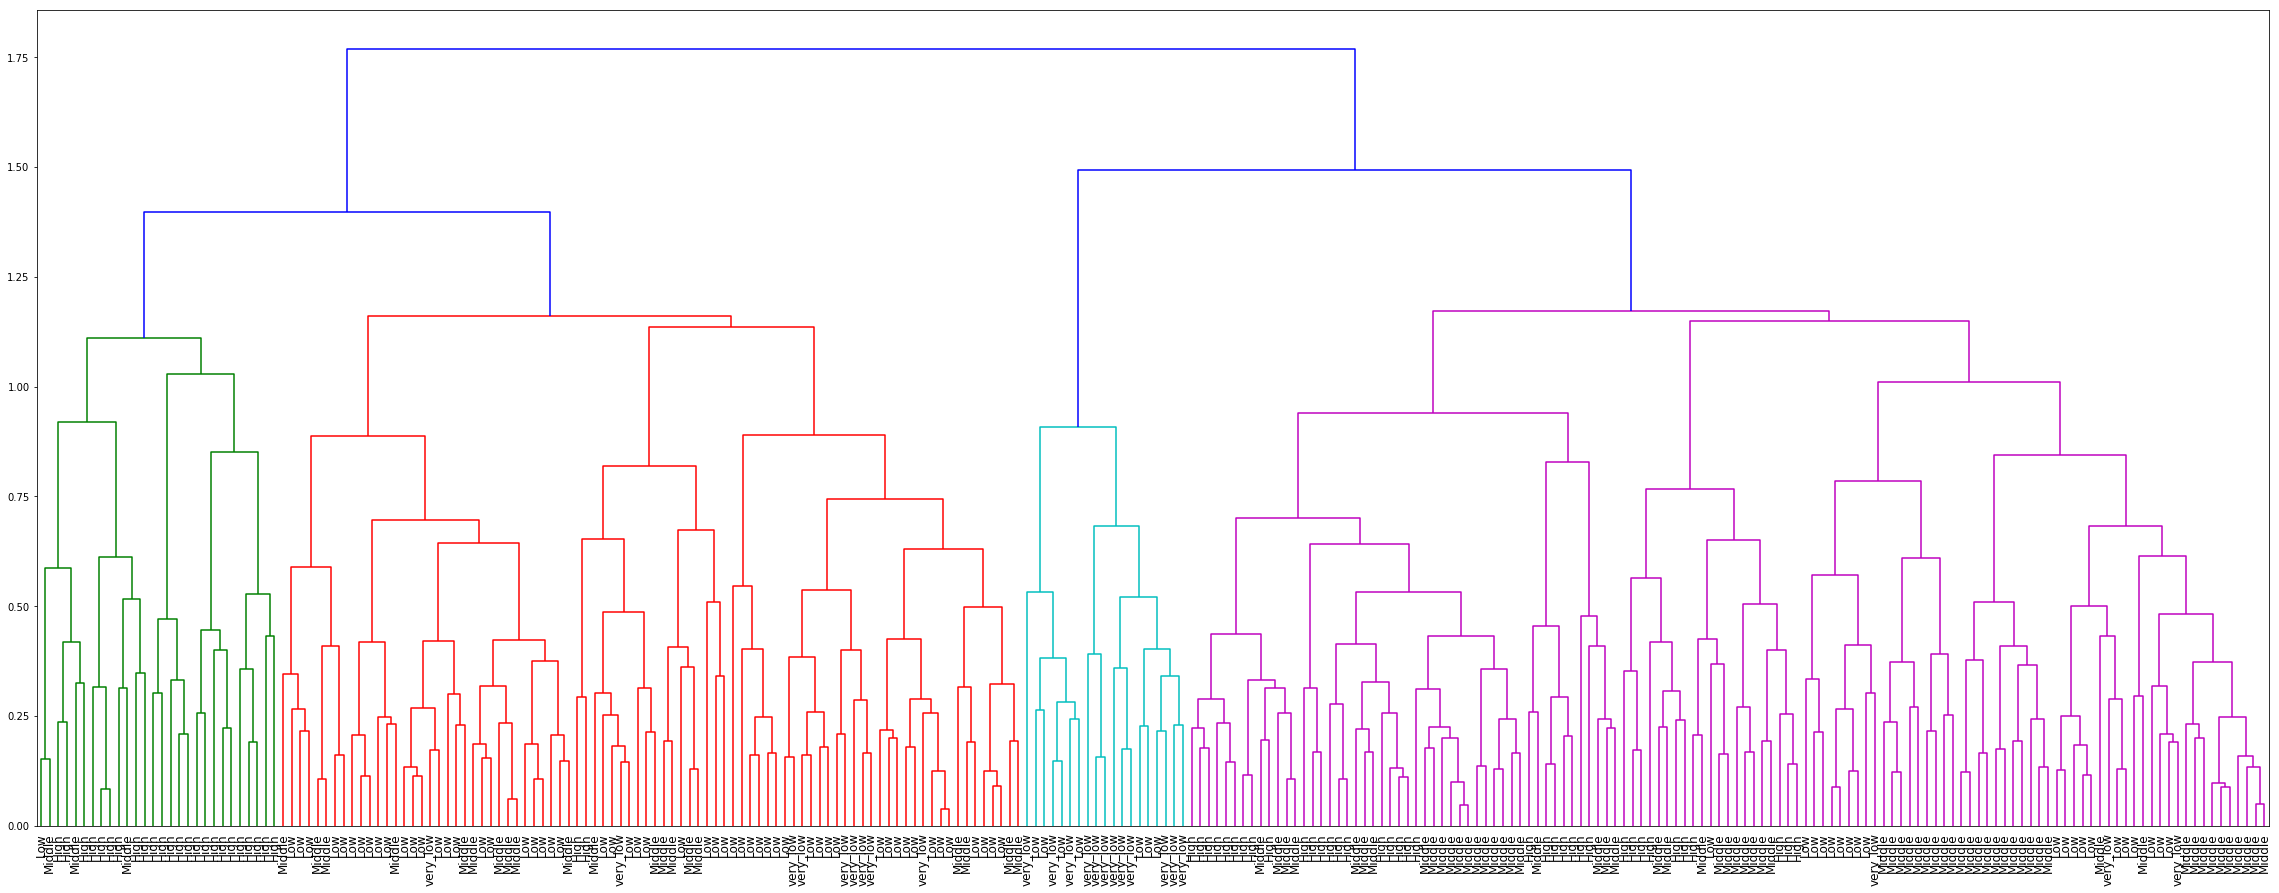

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings=linkage(X,method='complete')
dendrogram(mergings,labels=y,leaf_rotation=90,leaf_font_size=12)
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(40, 15)
plt.show()

In [10]:
# pairing study time and exam performance for goal objects
X1=df.STG
y1=df.PEG

# pairing study time and exam performance for related objects
X2=df.STR
y2=df.LPR

In [11]:
from sklearn.cluster import KMeans

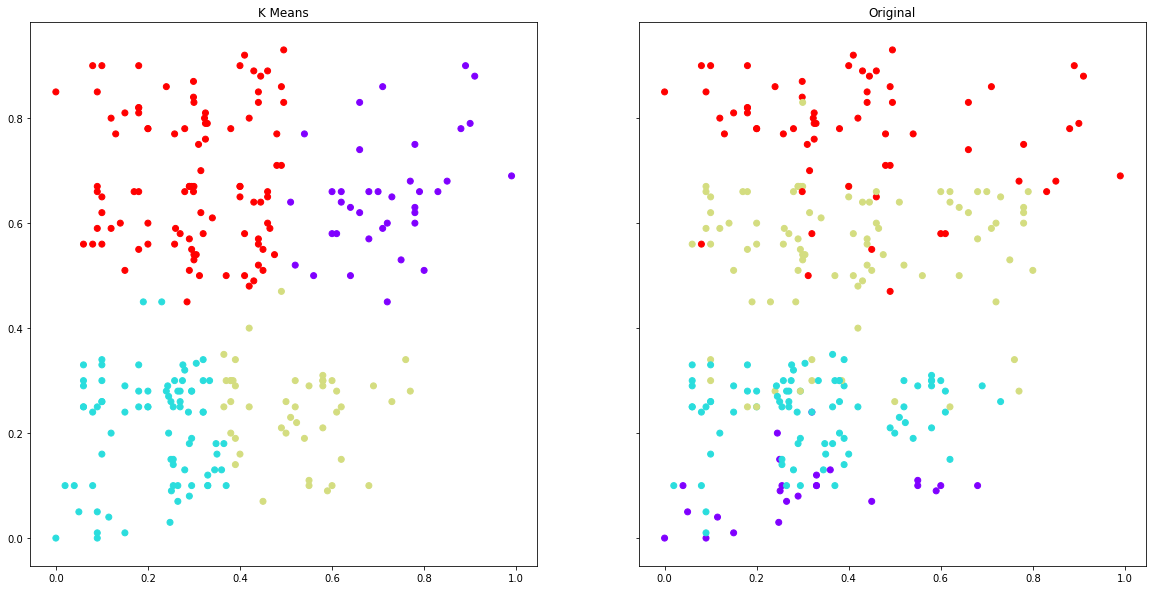

In [12]:
# K means
# on goal_results - pairing study time and exam performance for goal objects
kmeans = KMeans(n_clusters=4)
kmeans.fit(goal_results)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,10))
plt.gcf().set_size_inches(20, 10)
ax1.set_title('K Means')
ax1.scatter(X1,y1,c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(X1,y1,c=df.grade,cmap='rainbow')

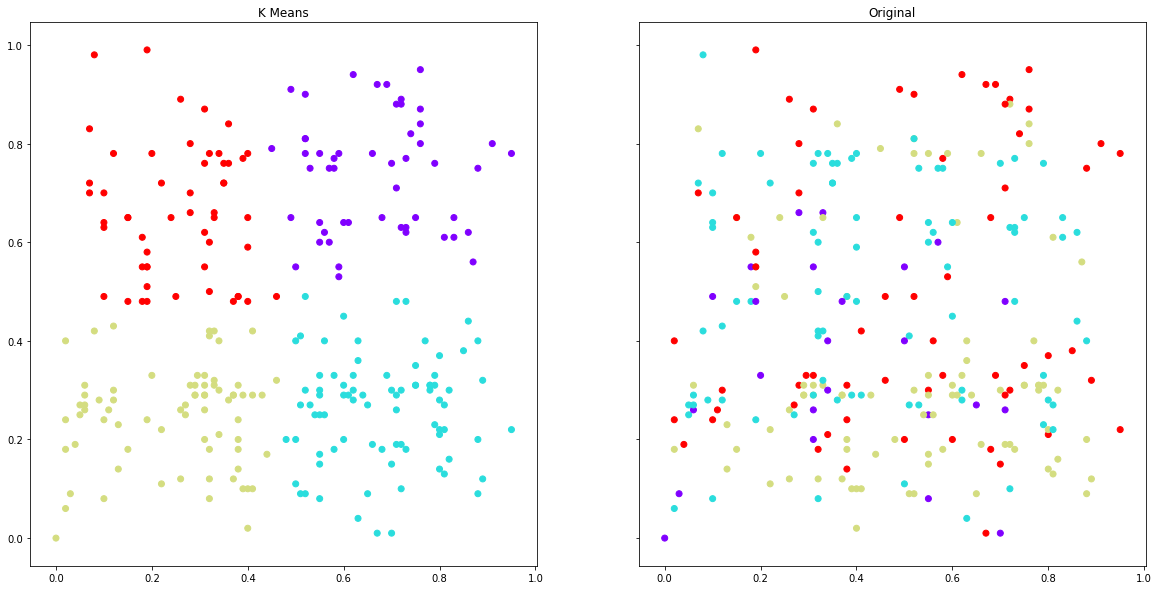

In [13]:
# K means
# on goal_related - pairing study time and exam performance for "related" objects
kmeans = KMeans(n_clusters=4)
kmeans.fit(goal_related)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,10))
plt.gcf().set_size_inches(20, 10)
ax1.set_title('K Means')
ax1.scatter(X2,y2,c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(X2,y2,c=df.grade,cmap='rainbow')

In [14]:
# merging the scores together
X3=X1+X2
y3=y1+y2
combined_result = pd.concat([X3,y3],axis=1)

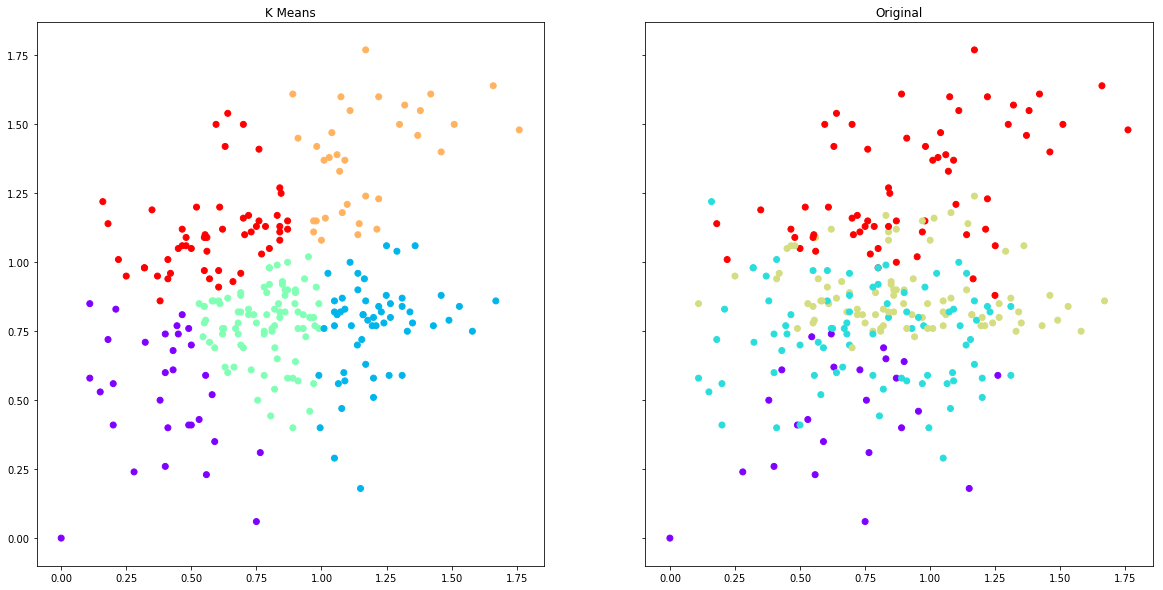

In [15]:
# K means
# on combined courses against combined results
kmeans = KMeans(n_clusters=5)
kmeans.fit(combined_result)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,10))
plt.gcf().set_size_inches(20, 10)
ax1.set_title('K Means')
ax1.scatter(X3,y3,c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(X3,y3,c=df.grade,cmap='rainbow')

In [16]:
df.iloc[:,0:5].values

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.08,  0.08,  0.1 ,  0.24,  0.9 ],
       [ 0.06,  0.06,  0.05,  0.25,  0.33],
       ..., 
       [ 0.54,  0.82,  0.71,  0.29,  0.77],
       [ 0.5 ,  0.75,  0.81,  0.61,  0.26],
       [ 0.66,  0.9 ,  0.76,  0.87,  0.74]])

In [17]:
# PCA
X4 = df.iloc[:,0:5].values
X5 = df.drop(columns=['SCG']).iloc[:,0:2].values

from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
pca.fit(X4)
X4_1=pca.transform(X4)
# NOTE: didn't use X4_1 PCA transformed, due to lower score achieved after optimizing one column out.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.25, random_state = 0)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("accuracy :",metrics.accuracy_score(y_test, y_pred))

[[12  0  1  0]
 [ 0 18  7  0]
 [ 2  4 17  0]
 [ 0  4  0  0]]
accuracy : 0.723076923077


In [19]:
# SVM Classification (redone)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("SVM classification accuracy :",metrics.accuracy_score(y_test, y_pred))

[[12  0  1  0]
 [ 0 24  0  1]
 [ 0  0 23  0]
 [ 0  1  0  3]]
SVM classification accuracy : 0.953846153846


In [20]:
# MLP (redone)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,5), random_state=1)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7,2), random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("MLP accuracy :",metrics.accuracy_score(y_test, y_pred))

MLP accuracy : 0.923076923077


(array([  3.,  14.,  12.,  10.,  15.,   7.,   4.]),
 array([ 0.01643096,  0.50161952,  0.98680808,  1.47199664,  1.9571852 ,
         2.44237376,  2.92756232,  3.41275088]),
 <a list of 7 Patch objects>)

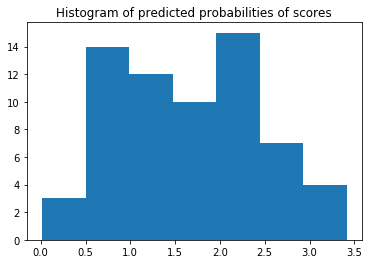

In [21]:
# linear regression
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X4, df.grade, test_size = 0.25, random_state = 0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)
#print("linear regression accuracy :",metrics.accuracy_score(y_test, y_pred))
plt.title('Histogram of predicted probabilities of scores')
plt.hist(y_pred, bins=7)

In [22]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("logistic regression accuracy :",metrics.accuracy_score(y_test, y_pred))

logistic regression accuracy : 0.723076923077
